# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from LifeCycleModel import LifeCycleModelModelClass

# Solve and simulate

In [2]:
model = LifeCycleModelModelClass(name='baseline')

In [3]:
par = model.par
sol = model.sol
sim = model.sim

In [4]:
model.solve()

 t = 54 solved in 3.7 secs
 t = 53 solved in 3.9 secs (post-decision: 3.9 secs)
 t = 52 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 51 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 50 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 49 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 48 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 47 solved in 0.1 secs (post-decision: 0.0 secs)
 t = 46 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 45 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 44 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 43 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 42 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 41 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 40 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 39 solved in 0.0 secs (post-decision: 0.0 secs)
 t = 38 solved in 0.2 secs (post-decision: 0.1 secs)
 t = 37 solved in 0.2 secs (post-decision: 0.1 secs)
 t = 36 solved in 0.2 secs (post-decision: 0.1 secs)
 t = 35 solved in 0

In [5]:
model.simulate()

model simulated in 8.5 secs


# Figures

## Income

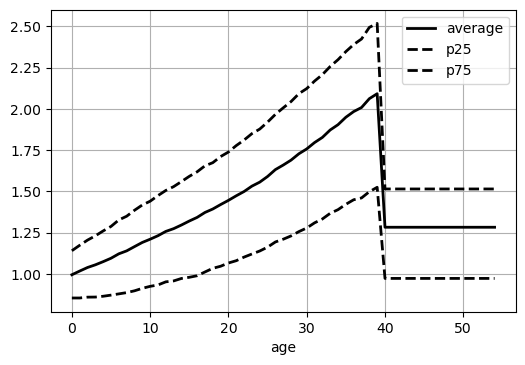

In [6]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.y,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.y,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.y,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

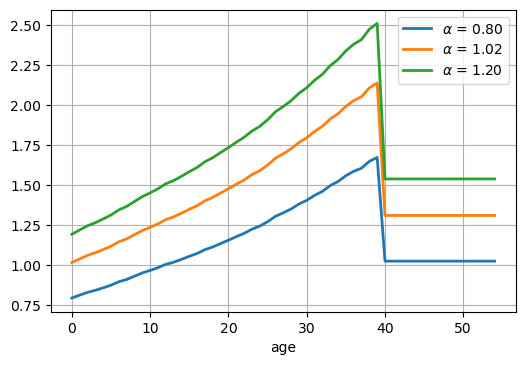

In [7]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
for ialpha in [0,par.Nalpha//2,par.Nalpha-1]:
    
    I = sim.alpha == par.grid_alpha[ialpha]
    ax.plot(age,np.mean(sim.y[:,I],axis=1),lw=2,label=f'$\\alpha$ = {par.grid_alpha[ialpha]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

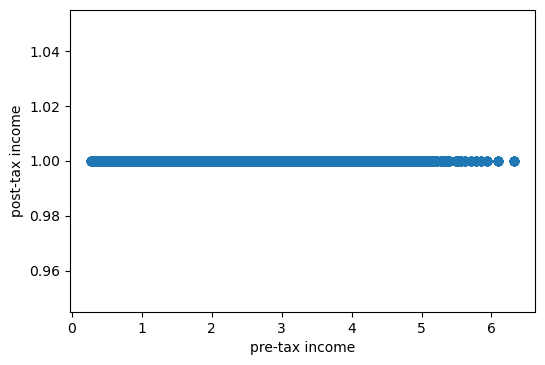

In [8]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.scatter(sim.y_pre[30,:],sim.y[30,:]/sim.y_pre[30,:])
ax.set_xlabel('pre-tax income')
ax.set_ylabel('post-tax income');

## Consumption

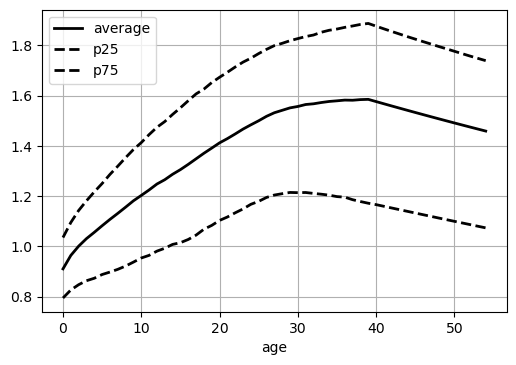

In [9]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.c,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.c,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.c,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

## Relative to $\alpha$

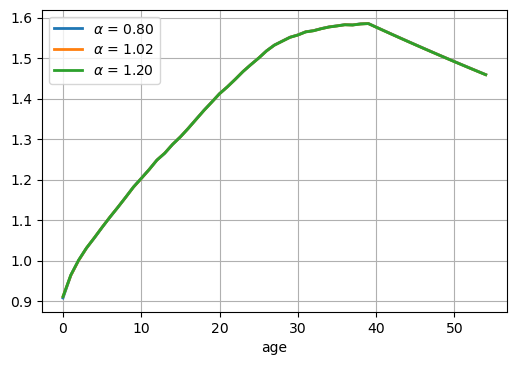

In [10]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)

mean_alpha = np.mean(sim.alpha)
for ialpha in [0,par.Nalpha//2,par.Nalpha-1]:
    
    alpha = par.grid_alpha[ialpha]
    I = sim.alpha == alpha
    
    ax.plot(age,np.mean(sim.c[:,I],axis=1)/alpha,lw=2,label=f'$\\alpha$ = {par.grid_alpha[ialpha]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

## Savings

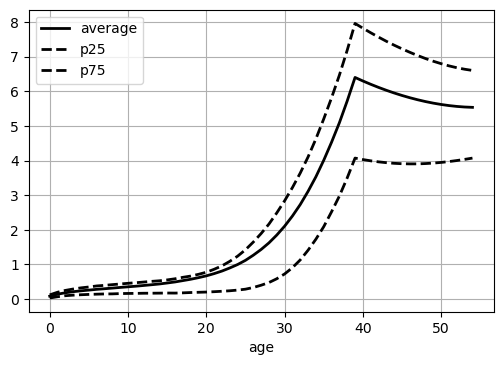

In [11]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
ax.plot(age,np.mean(sim.a,axis=1),lw=2,color='black',label='average')
ax.plot(age,np.percentile(sim.a,25,axis=1),lw=2,color='black',ls='--',label='p25')
ax.plot(age,np.percentile(sim.a,75,axis=1),lw=2,color='black',ls='--',label='p75')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

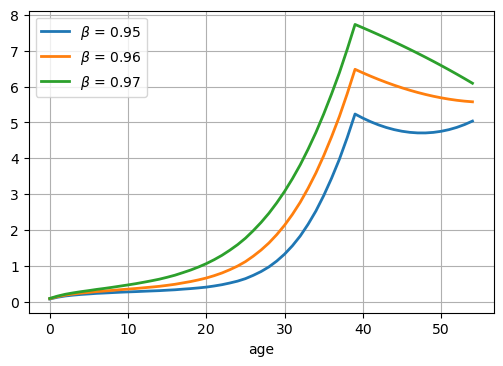

In [12]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.T)
for ibeta in [0,par.Nbeta//2,par.Nbeta-1]:
    
    I = sim.beta == par.grid_beta[ibeta]
    ax.plot(age,np.mean(sim.a[:,I],axis=1),lw=2,label=f'$\\beta$ = {par.grid_beta[ibeta]:.2f}')
    
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

# MPC(P)[t]

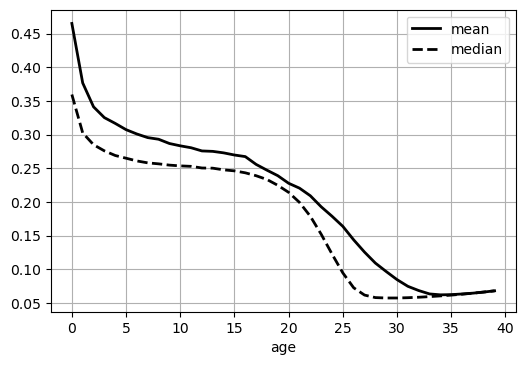

In [13]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPC[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPC[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

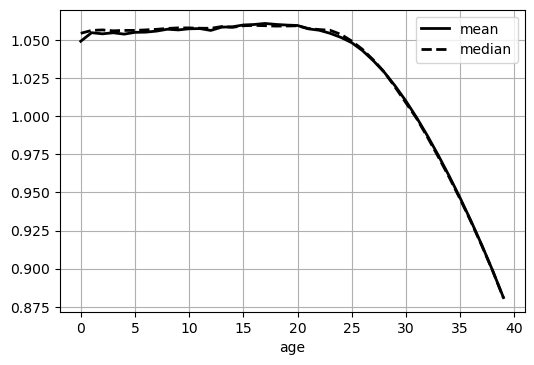

In [14]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_perm[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_perm[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

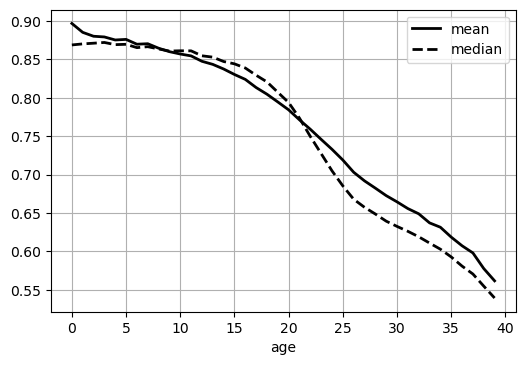

In [15]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_pers[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_pers[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age');

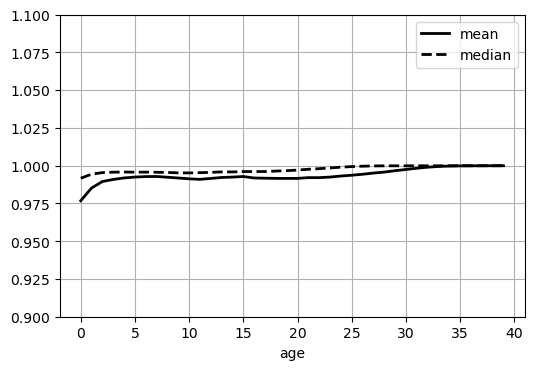

In [16]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
age = np.arange(par.Tr)
ax.plot(age,np.mean(sim.MPCP_scale[:par.Tr,:],axis=1),lw=2,color='black',label='mean')
ax.plot(age,np.median(sim.MPCP_scale[:par.Tr,:],axis=1),lw=2,color='black',ls='--',label='median')
ax.legend(frameon=True)
ax.grid(True)
ax.set_xlabel('age')
ax.set_ylim([0.9,1.1]);

In [17]:
def print_MPCP(model):
    
    print(f' perm: {np.mean(model.sim.MPCP_perm[:par.Tr,:]):.4f}')
    print(f' pers: {np.mean(model.sim.MPCP_pers[:par.Tr,:]):.4f}')
    print(f'scale: {np.mean(model.sim.MPCP_scale[:par.Tr,:]):.4f}')
            

In [18]:
print_MPCP(model)

 perm: 1.0273
 pers: 0.7633
scale: 0.9937


# Other models

In [19]:
for sigma0 in [4.0,8.0]:
    
    print(f'{sigma0 = :.2f}')
    
    model_ = model.copy()
    model_.par.sigma0 = sigma0
    model_.par.do_print = False
    model_.solve()
    model_.simulate()
    print_MPCP(model_)
    
    print('')

sigma0 = 4.00
 perm: 1.0624
 pers: 0.7317
scale: 0.9956

sigma0 = 8.00
 perm: 1.1232
 pers: 0.6647
scale: 0.9980



In [20]:
for rho in [0.9,1.0]:
    
    print(f'{rho = :.2f}')
    
    model_ = model.copy()
    model_.par.rho = rho
    model_.par.do_print = False
    model_.solve()
    model_.simulate()
    print_MPCP(model_)
    
    print('')

rho = 0.90
 perm: 1.0199
 pers: 0.6912
scale: 0.9930

rho = 1.00
 perm: 1.0503
 pers: 0.8794
scale: 0.9951



# Data sets

In [21]:
model_homo = model.copy()
model_homo.name = 'homotheticity_simple'
model_homo.par.tau = 0.15
model_homo.par.do_print = False
model_homo.solve()
model_homo.simulate()
print_MPCP(model_homo)

 perm: 1.0253
 pers: 0.7684
scale: 0.9579


In [22]:
model_homo_full = model_homo.copy()
model_homo_full.name = 'homotheticity_full'
model_homo_full.par.iota = 10.0
model_homo_full.allocate()
model_homo_full.solve()
model_homo_full.simulate()
print_MPCP(model_homo)

 perm: 1.0253
 pers: 0.7684
scale: 0.9579


In [23]:
model_non_homo = model_homo.copy()
model_non_homo.name = 'non_homotheticity_simple'
model_non_homo.par.sigma0 = 12.0
model_non_homo.par.aubar = 15.0
model_non_homo.par.omega = 0.95
model_non_homo.solve()
model_non_homo.simulate()
print_MPCP(model_non_homo)

 perm: 0.6649
 pers: 0.4694
scale: 0.6469


In [24]:
model_non_homo_full = model_non_homo.copy()
model_non_homo_full.name = 'non_homotheticity_full'
model_non_homo_full.par.iota = 10.0
model_non_homo_full.allocate()
model_non_homo_full.solve()
model_non_homo_full.simulate()
print_MPCP(model_non_homo_full)

 perm: 0.6662
 pers: 0.4733
scale: 0.6542


# Export

In [25]:
import pandas as pd

In [26]:
models = [model_homo,model_homo_full,model_non_homo,model_non_homo_full]
for model_ in models:
    
    out = {}
    for k,v in model_.sim.__dict__.items():
        if k in ['alpha','beta','psi','xi','p','m']: continue
        out[k] = v[:par.Tr,::100].ravel()
        
    pd.DataFrame(out).to_stata(f'data/{model_.name}.dta')